In [15]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# import seaborn as sns

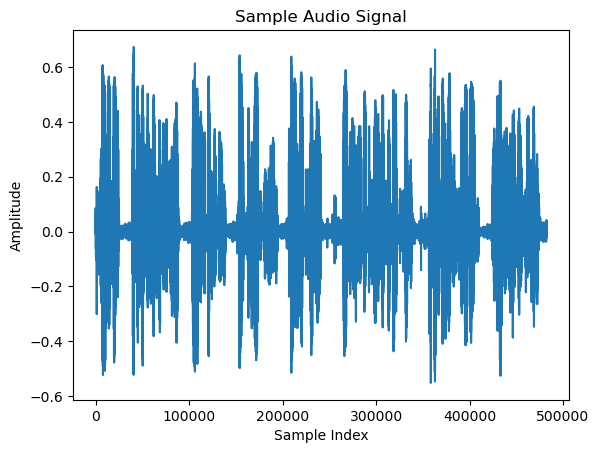

In [31]:
y, sr = librosa.load('data/english/english1_male_pittsburgh_pennsylvania_usa.wav')
plt.plot(y)
plt.title('Sample Audio Signal')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.show()


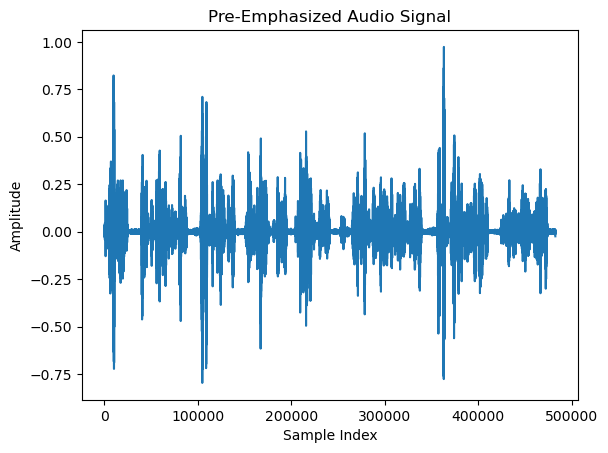

In [32]:
pre_emphasized = np.append(y[0], y[1:] - 0.97 * y[:-1])
plt.plot(pre_emphasized)
plt.title('Pre-Emphasized Audio Signal')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.show()

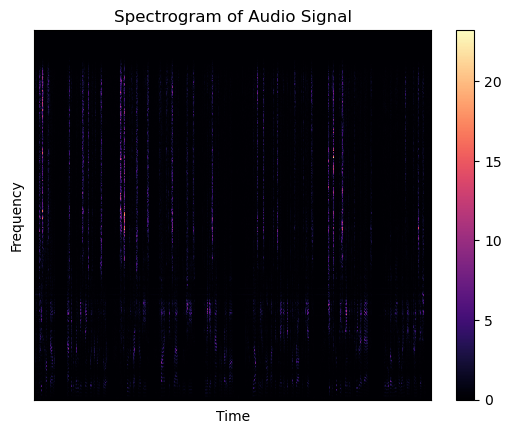

In [40]:
spectrogram = librosa.core.stft(pre_emphasized, n_fft=1024, hop_length=512)
spectrogram_magnitude, _ = librosa.core.magphase(spectrogram)
librosa.display.specshow(spectrogram_magnitude, sr=sr, hop_length=512)
plt.title('Spectrogram of Audio Signal')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.colorbar()
plt.show()

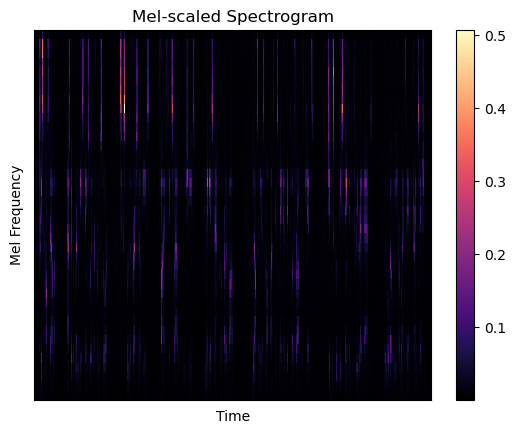

In [41]:
mel_filterbank = librosa.filters.mel(sr=sr, n_fft=1024, n_mels=40)
mel_spectrogram = np.dot(mel_filterbank, spectrogram_magnitude)
librosa.display.specshow(mel_spectrogram, sr=sr, hop_length=512)
plt.title('Mel-scaled Spectrogram')
plt.xlabel('Time')
plt.ylabel('Mel Frequency')
plt.colorbar()
plt.show()

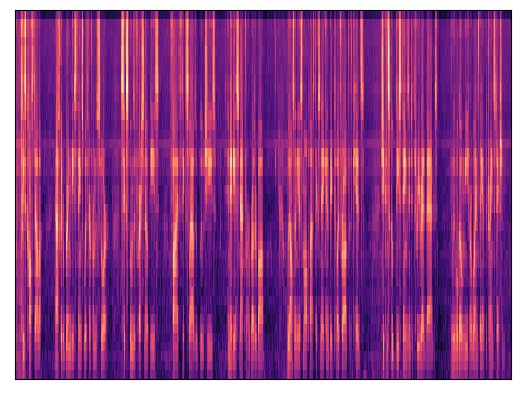

In [42]:
log_mel_spectrogram = np.log10(mel_spectrogram + 1e-9)
librosa.display.specshow(log_mel_spectrogram, sr=sr, hop_length=512)

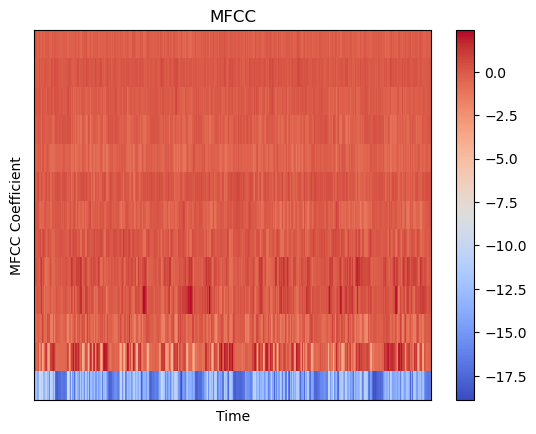

In [43]:
mfcc = librosa.feature.mfcc(S=log_mel_spectrogram, n_mfcc=13)
librosa.display.specshow(mfcc, sr=sr, hop_length=512)
plt.title('MFCC')
plt.xlabel('Time')
plt.ylabel('MFCC Coefficient')
plt.colorbar()
plt.show()